<a href="https://colab.research.google.com/github/nadaAlruwaythi/Riyadh-Marathon-2023/blob/main/Marathon%202023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df=pd.read_csv('Riyadh Marathon 2023.csv')
df.head()

,Rank,Name,Gender,Category,Nationality,Gun Time,Chip Time
0,1.0,42eb63b2-5dba-4030-bf6d-2b1f83ac611b,Female,4km,GBR,19:02,18:41
1,2.0,ab274d04-e39c-48d8-8dbd-4ecbce5cc95d,Female,4km,KSA,19:50,19:42
2,3.0,9b249d53-c90b-4b48-b23b-ec5f141ef44c,Female,4km,FRA,21:15,21:15
3,4.0,28e13d85-38d4-483c-b9cc-93b9bd9bde14,Female,4km,JOR,21:32,21:25
4,5.0,0a1c87a5-344e-4d27-9182-32f654230ebb,Female,4km,KSA,21:55,21:40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12009 entries, 0 to 12008
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         11999 non-null  float64
 1   Name         12009 non-null  object 
 2   Gender       12009 non-null  object 
 3   Category     12009 non-null  object 
 4   Nationality  11947 non-null  object 
 5   Gun Time     11997 non-null  object 
 6   Chip Time    11181 non-null  object 
dtypes: float64(1), object(6)
memory usage: 656.9+ KB


In [6]:
df.isnull().sum()

Rank            10
Name             0
Gender           0
Category         0
Nationality     62
Gun Time        12
Chip Time      828
dtype: int64

In [7]:
df.tail()

,Rank,Name,Gender,Category,Nationality,Gun Time,Chip Time
12004,0.0,4e452f33-f457-4a85-b162-8bd2525d27ef,Male,Marathon,KSA,DNS,NaN
12005,0.0,71b836d3-8d7a-4744-bb89-23dc843009f4,Male,Marathon,KSA,DNS,NaN
12006,0.0,99a58f21-7a17-45b6-bbf0-659ee09b6495,Male,Marathon,KSA,DNS,5:29:20
12007,0.0,ea152733-39b8-405c-98d1-2a32d38c87c8,Male,Marathon,KSA,DNS,5:29:47
12008,NaN,e5e5ca44-730e-483c-94d9-62c1225b65b9,Male,Marathon,NaN,NaN,NaN


In [8]:
df['Gun Time'].value_counts()

DNS        862
DNF         10
49:24       10
DSQ          9
57:47        8
          ... 
1:11:08      1
1:11:13      1
1:11:14      1
1:11:18      1
2:05:37      1
Name: Gun Time, Length: 6413, dtype: int64

In [9]:
df.Category.value_counts()

4km                    4500
10km                   4476
Half Marathon          2471
Marathon                516
MARATHON ELITE           32
Half Marathon Elite      14
Name: Category, dtype: int64

In [10]:

categories=df.Category.unique()

def percentage (category):
    x = df[df['Category']==category]
    percentageFemale = round((len(x[x['Gender'] == 'Female'])/len(x)),2)
    percentageMale = round((len(x[x['Gender'] == 'Male'])/len(x)),2)
    return percentageFemale, percentageMale

y=0
for x in categories:
    print('Females are', percentage(x)[0],'of all participants in',categories[y], 'while Males are', percentage(x)[1])
    y+=1

Females are 0.46 of all participants in 4km while Males are 0.54
Females are 0.47 of all participants in MARATHON ELITE while Males are 0.53
Females are 0.15 of all participants in Marathon while Males are 0.85
Females are 0.31 of all participants in 10km while Males are 0.69
Females are 0.5 of all participants in Half Marathon Elite while Males are 0.5
Females are 0.21 of all participants in Half Marathon while Males are 0.79


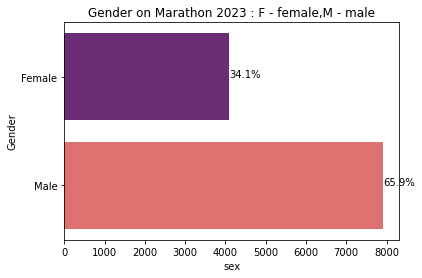

In [16]:
ax = sns.countplot(y="Gender", data=df ,palette="magma")
plt.title('Gender on Marathon 2023 : F - female,M - male')
plt.xlabel('sex')

total = len(df['Category'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))




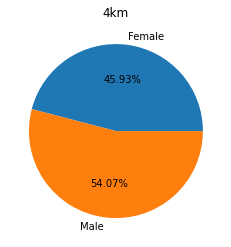

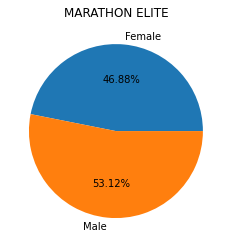

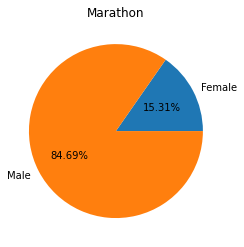

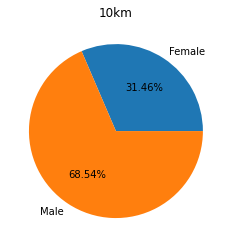

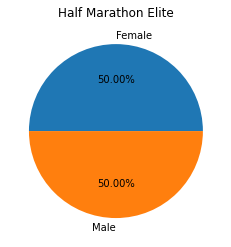

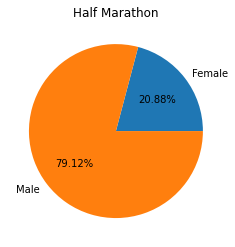

In [12]:
def piechart (category):
    x = df[df['Category']==category]
    cat_arr = np.array(x['Gender'])

    gender_labels, gender_counts = np.unique(x['Gender'],return_counts=True)

    

    plt.figure()
    plt.pie(gender_counts, labels = gender_labels,autopct='%.2f%%') #autopct to format labels
    plt.title(category)
    plt.show()


for x in categories:
    piechart(x)